# Importing Modules

In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as pyt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score,f1_score, confusion_matrix

In [164]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [165]:
df.shape

(614, 13)

In [166]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [167]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [168]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

# Data Manipulation

In [169]:
#for data manipulating we have to fill null values of both numerical and categorical values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [170]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [171]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [172]:
#Here we can see that there are 4 missing values in categorical variables ('Gender','Married','Dependents','Self_Employed)
#and 3 missing values in non-categorical variables('Loan_Amount','Loan_Amount_Term','Credit_History')
#to remove missing values from categorical variables (replace it with mode) 
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [173]:
#to remove missing values from non-categorical variables(replace it with mean)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [174]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [175]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [176]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [177]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


# Data Exploration

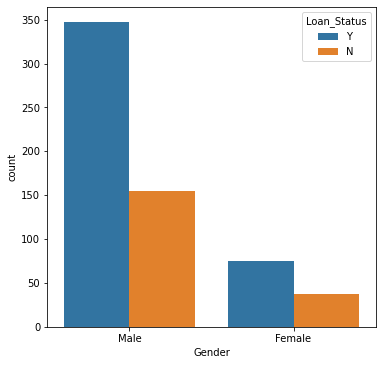

In [178]:
#Exploration of categorical variables
pyt.figure(figsize = (20, 20))
pyt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

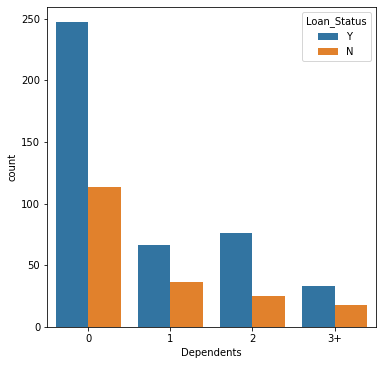

In [179]:
pyt.figure(figsize = (20, 20))
pyt.subplot(332)
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

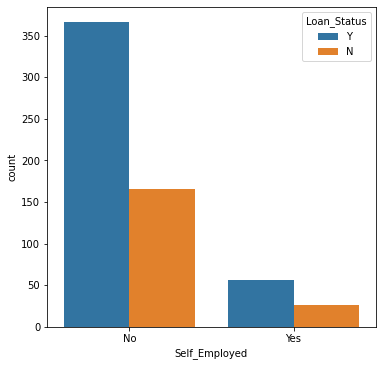

In [180]:
pyt.figure(figsize = (20, 20))
pyt.subplot(333)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

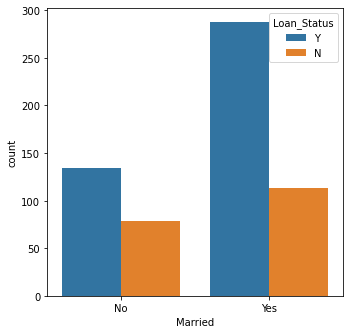

In [181]:
pyt.figure(figsize = (18, 18))
pyt.subplot(334)
sns.countplot(df['Married'],hue=df['Loan_Status'])

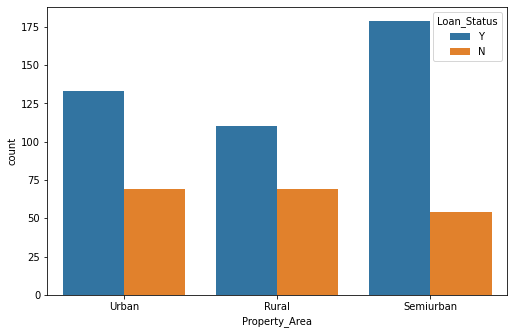

In [182]:
pyt.figure(figsize = (28, 18))
pyt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

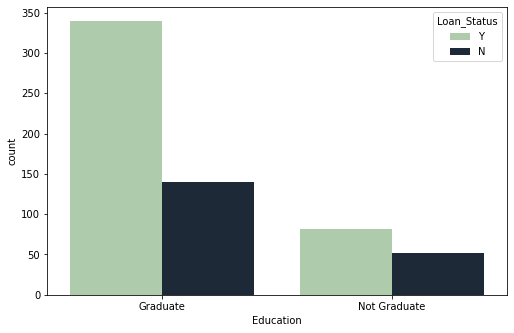

In [183]:
pyt.figure(figsize = (28, 18))
pyt.subplot(336)
sns.countplot(df['Education'],hue=df['Loan_Status'],palette="ch:r=-.5,l=.75")

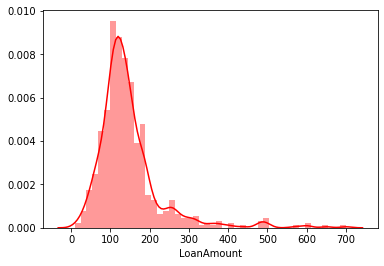

In [184]:
#exploration for non categorical variables
sns.distplot(df['LoanAmount'],color="red")

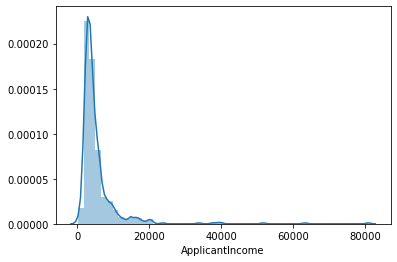

In [185]:
sns.distplot(df['ApplicantIncome'])

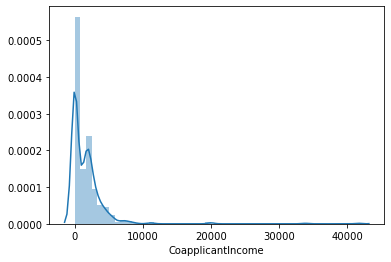

In [186]:
sns.distplot(df['CoapplicantIncome'])

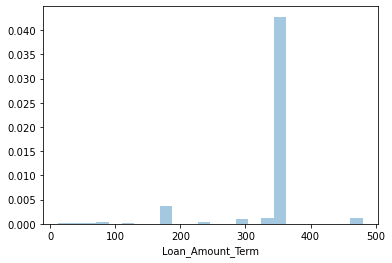

In [187]:
sns.distplot(df['Loan_Amount_Term'])

# Adding new attributes 

In [188]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [189]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [190]:
#to find emi and interest rates

# Performing log transformation on non-categorical graphs

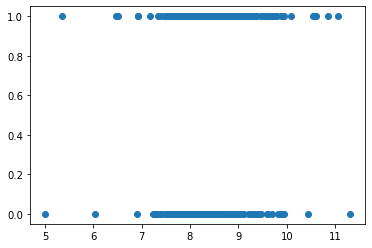

In [284]:
#since all graph of non-categorical variables is left skewed so we are performing log transformations
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])
#sns.FacetGrid(sns.distplot(df['ApplicantIncome_log']),hue=df['Loan_Status'],size=5).add_legend()
#map(sns.distplot(df['ApplicantIncome_log']),df['Loan_Status'])
pyt.scatter(df['ApplicantIncome_log'],df['Loan_Status'])

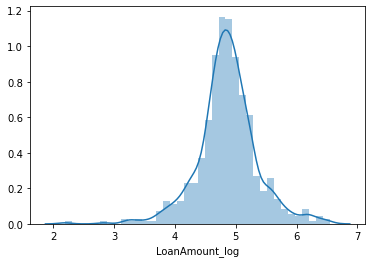

In [192]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_log'])

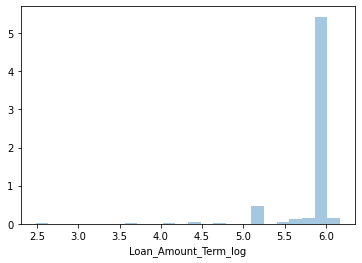

In [193]:
df['Loan_Amount_Term_log']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_log'])

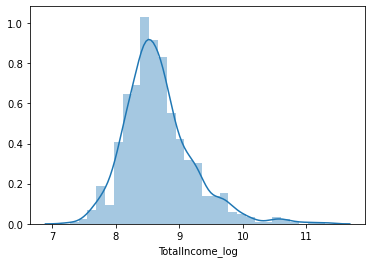

In [194]:
df['TotalIncome_log']=np.log(df['TotalIncome'])
#pyt.pie(df['TotalIncome_log'])
sns.distplot(df['TotalIncome_log'])

# Data Preparation for model building 
sklearn requires all inputs to be numeric,so we should convert all our categorical variables into numeric by encoding the categories.

In [195]:
cat_list=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for variables in cat_list:
    label_encoding=preprocessing.LabelEncoder()
    df[variables]=label_encoding.fit_transform(df[variables].astype('str'))
df.dtypes

Loan_ID                  object
Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History            int32
Property_Area             int32
Loan_Status               int32
TotalIncome             float64
ApplicantIncome_log     float64
LoanAmount_log          float64
Loan_Amount_Term_log    float64
TotalIncome_log         float64
dtype: object

In [196]:
df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
TotalIncome             0
ApplicantIncome_log     0
LoanAmount_log          0
Loan_Amount_Term_log    0
TotalIncome_log         0
dtype: int64

In [197]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [198]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2,1,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0,0,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2,1,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2,1,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2,1,6000.0,8.699515,4.948760,5.886104,8.699515


# Model Building

In [199]:
df['type']="Train"
test['type']="Test"
#combining both dataset
complete_data=pd.concat([df,test],axis=0)
complete_data.isnull().sum()


Loan_ID                   0
Gender                   11
Married                   0
Dependents               10
Education                 0
Self_Employed            23
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                5
Loan_Amount_Term          6
Credit_History           29
Property_Area             0
Loan_Status             367
TotalIncome             367
ApplicantIncome_log     367
LoanAmount_log          367
Loan_Amount_Term_log    367
TotalIncome_log         367
type                      0
dtype: int64

In [200]:
#Identifying categorical and continous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
categorical_columns = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [201]:
#removing missing values from complete_data
complete_data['Gender'].fillna(complete_data['Gender'].mode()[0],inplace=True)
complete_data['Married'].fillna(complete_data['Married'].mode()[0],inplace=True)
complete_data['Loan_Amount_Term'].fillna(complete_data['Loan_Amount_Term'].mode()[0],inplace=True)
complete_data['Dependents'].fillna(complete_data['Dependents'].mode()[0],inplace=True)
complete_data['Credit_History'].fillna(complete_data['Credit_History'].mode()[0],inplace=True)
complete_data['Self_Employed'].fillna(complete_data['Self_Employed'].mode()[0],inplace=True)
complete_data['LoanAmount'].fillna(complete_data['LoanAmount'].mean(), inplace=True)
complete_data['Loan_Status'].fillna(complete_data['Loan_Status'].mean(), inplace=True)
#complete_data['LoanAmount_log'].fillna(complete_data['LoanAmount_log'].mean(), inplace=True)
complete_data['Loan_Amount_Term'].fillna(complete_data['Loan_Amount_Term'].mean(), inplace=True)
complete_data['ApplicantIncome'].fillna(complete_data['ApplicantIncome'].mean(), inplace=True)
complete_data['CoapplicantIncome'].fillna(complete_data['CoapplicantIncome'].mean(), inplace=True)
complete_data['TotalIncome'].fillna(complete_data['TotalIncome'].mean(), inplace=True)

In [202]:
complete_data['TotalIncome']=complete_data['ApplicantIncome'] + complete_data['CoapplicantIncome']

complete_data['TotalIncome_log'] = np.log(complete_data['TotalIncome'])


In [203]:
complete_data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
TotalIncome               0
ApplicantIncome_log     367
LoanAmount_log          367
Loan_Amount_Term_log    367
TotalIncome_log           0
type                      0
dtype: int64

In [204]:
#ROC dict for TPR and FPR values
roc_dict = {}

#precision recall curve
prc_dict = {}


def modify_roc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for ROC metrics
    """
    
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    
    clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    
    dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for precision recall metrics
    """
    
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    
    dict_modify[name] = clf_prc_dict

# Logistic Regression

In [205]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [206]:
# X is the input and Y is the output

X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married',
        'Gender','Education','Self_Employed','Property_Area']].values
y=df[["Loan_Status"]].values

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [208]:
model.fit(X_train,y_train)

LogisticRegression()

In [209]:
model.score(X_train,y_train)*100

78.32167832167832

In [210]:
model.score(X_test,y_test)*100

81.08108108108108

In [211]:
expected = y_test
predicted = model.predict(X_test)

In [212]:
#  Printing the Report

print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       0.74      0.49      0.59        51
           1       0.83      0.93      0.88       134

    accuracy                           0.81       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.80      0.81      0.80       185



In [213]:
# Out of 51 'Y' outcomes, 23 were right and 28 were wrong similarly, for'N', 131 were right and 3 were wrong.

print(metrics.confusion_matrix(expected, predicted))


[[ 25  26]
 [  9 125]]


In [214]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression',
                dict_modify=prc_dict)

# Support Vector Machine

In [215]:
from sklearn.svm import SVC
model = SVC()

In [216]:
# Training the Model

model.fit(X_train,y_train)

SVC()

In [217]:
# Accuracy of the model in training

model.score(X_train,y_train)

0.675990675990676

In [218]:
# Accuracy of the model in Testing

model.score(X_test,y_test)

0.7243243243243244

In [219]:
# Importing Libraries and Classes

from sklearn import metrics

In [220]:
# Obtaining Report

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59        51
           1       0.83      0.93      0.88       134

    accuracy                           0.81       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.80      0.81      0.80       185



In [221]:
# Output in the form of count

print(metrics.confusion_matrix(expected, predicted))

[[ 25  26]
 [  9 125]]


In [162]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='SVM', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='SVM',
                dict_modify=prc_dict)

AttributeError: predict_proba is not available when  probability=False

# RandomForest

In [222]:
# Importing libraries and classes

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [223]:
# Training the model

model.fit(X_train,y_train)


RandomForestClassifier()

In [224]:
# Accuracy in training the model

model.score(X_train,y_train)

1.0

In [225]:
#Accuracy in testing the model

model.score(X_test,y_test)

0.8108108108108109

In [226]:
# Y contains all the outputs and X contains all the inputs. We will test on the machine if it gives to expected Output for the 
# corresponding Inputs.

expected = y_test
predicted = model.predict(X_test)

In [227]:
# Generating Report
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        51
           1       0.82      0.95      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.70      0.72       185
weighted avg       0.80      0.81      0.79       185



In [228]:
# Output in the form of Matrix
print(metrics.confusion_matrix(expected, predicted))

[[ 23  28]
 [  7 127]]


In [229]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Random Forest', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Random Forest',
                dict_modify=prc_dict)

# DecisionTree

In [230]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [231]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [232]:
model.score(X_train,y_train)

1.0

In [233]:
model.score(X_test,y_test)

0.7081081081081081

In [234]:
expected = y_test
predicted = model.predict(X_test)

In [235]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46        51
           1       0.79      0.81      0.80       134

    accuracy                           0.71       185
   macro avg       0.63      0.63      0.63       185
weighted avg       0.70      0.71      0.71       185



In [236]:
print(metrics.confusion_matrix(expected, predicted))

[[ 23  28]
 [ 26 108]]


In [237]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Decision Tree', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='Decision Tree',
                dict_modify=prc_dict)

# Gradient Boosting Classifier

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

In [239]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [240]:
model.score(X_train,y_train)

0.9044289044289044

In [241]:
model.score(X_test,y_test)

0.8162162162162162

In [242]:
expected = y_test
predicted = model.predict(X_test)

In [243]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.76      0.49      0.60        51
           1       0.83      0.94      0.88       134

    accuracy                           0.82       185
   macro avg       0.79      0.72      0.74       185
weighted avg       0.81      0.82      0.80       185



In [244]:
print(metrics.confusion_matrix(expected, predicted))

[[ 25  26]
 [  8 126]]


In [245]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='gboost', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='gboost',
                dict_modify=prc_dict)

# KNN

In [246]:

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [247]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [248]:
model.score(X_train,y_train)

0.7435897435897436

In [249]:
model.score(X_test,y_test)

0.6270270270270271

In [250]:
expected = y_test
predicted = model.predict(X_test)

In [251]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        51
           1       0.73      0.78      0.75       134

    accuracy                           0.63       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.61      0.63      0.62       185



In [252]:
print(metrics.confusion_matrix(expected, predicted))

[[ 12  39]
 [ 30 104]]


In [253]:
#metrics for lr
modify_roc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='KNN', 
                dict_modify=roc_dict)
modify_prc_dict(clf=model,
                y_test=y_test,
                X_test=X_test,
                name='KNN',
                dict_modify=prc_dict)

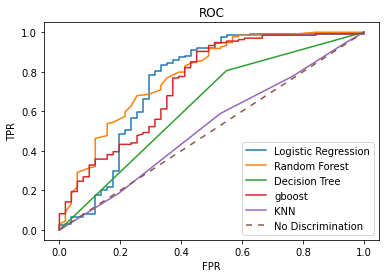

In [255]:
for key in roc_dict:
    clf = roc_dict[key]
    pyt.plot(clf['fpr'], clf['tpr'], label=key)
pyt.xlabel("FPR")
pyt.ylabel("TPR")
pyt.title("ROC")
pyt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(4, 4))
#pyt.savefig(os.path.join('roc_curve_all_models.png'))
pyt.legend()
pyt.show()

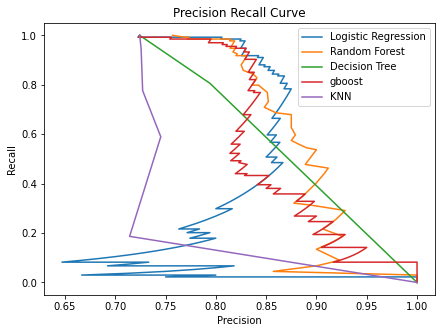

In [265]:
pyt.figure(figsize = (7, 5))
for key in prc_dict:
    clf = prc_dict[key]
    pyt.plot(clf['precision'], clf['recall'], label=key)
    

pyt.xlabel("Precision")
pyt.ylabel("Recall")
pyt.title("Precision Recall Curve")
#plt.savefig(os.path.join('plots/prc_curve_all_models.png'))

pyt.legend()

pyt.show()